In [1]:
####
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors

import matplotlib.gridspec as gridspec
import statsmodels.tsa.stattools as smt

import iris
import iris.plot as iplt
iris.FUTURE.netcdf_promote=True
import iris.coord_categorisation
from eofs.iris import Eof
from iris.analysis import stats

from matplotlib.patches import FancyArrowPatch

## Upload files

In [2]:
# Upload observations
file_obs = ('/nfs/see-fs-01_users/mlzp121/ee22kvcs/NOAAERSSTv5_1870_2018_monthly_sst_no_annual_cycle_detrended_regridded.nc')
sst_obs = iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')
cube_obs = iris.load_cube(file_obs,sst_obs)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):


In [3]:
#Define constraints to make cubes for SST variables
constraints = [iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'TS'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'THO'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'temp'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'tos'),
               iris.Constraint(cube_func=lambda cube: cube.var_name == 'sst')]

In [4]:
# Upload Eoi400 simulations (MP)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_mp = ['0-200_timeseries_CCSM4Utr','501-1099_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2001-2501_timeseries_HadCM3','1850-2049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '1001-1200_timeseries_NorESML']
MP_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'EOI400.SST.'+names_models_mp[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    MP_models.append(uploaded_cubes)

#print(MP_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdty

In [5]:
# Upload E280 simulations (PI)
path = '/nfs/hera1/ee22kvcs/'
models = [ 'CCSM4Utr', 'CESM1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A', 'MIROC4m', 'NorESML']
names_models_pi = ['0-200_timeseries_CCSM4Utr','501-806_timeseries_CESM1.2','2300-2799_timeseries_COSMOS',
                '2411-2911_timeseries_HadCM3','2850-3049_timeseries_IPSLCM6A','0-500_timeseries_MIROC4m',
                '0-200_timeseries_NorESML']
PI_models = []
for i in range(np.size(models)):
    uploaded_cubes = iris.load_cube(path+'E280.SST.'+names_models_pi[i]+'_no_ann_cycle.nc', constraints[i])
    if i == 2:
        uploaded_cubes = uploaded_cubes[:, 0, :, :]
    else:
        uploaded_cubes = uploaded_cubes
    PI_models.append(uploaded_cubes)

#print(PI_models)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(cf_var.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1813: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdty

## ONI (Figure 5)

In [6]:
#ENSO3.4 region
# Delimt the region for the cube
min_lat = -5.0
max_lat = 5.0
min_lon = 190.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def nino_lat(input):
    return min_lat  <= input <= max_lat 
def nino_lon(input):
    return min_lon  <= input <= max_lon 

nino_con = iris.Constraint(latitude = nino_lat, longitude = nino_lon)

# Subset the cube
nino_obs_subset = nino_con.extract(cube_obs)

nino_mp_subset = []
for i in MP_models:
    nino_mp_sub = nino_con.extract(i)
    nino_mp_subset.append(nino_mp_sub)
    
nino_pi_subset = []
for j in PI_models:
    nino_pi_sub = nino_con.extract(j)
    nino_pi_subset.append(nino_pi_sub)

In [7]:
# Spatial average ENSO: ONI
mean_nino_mp = []
mean_nino_pi = []
mean_nino_obs = nino_obs_subset.collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
for e in range(len(nino_mp_subset)):
    equator_mean_mp34 = nino_mp_subset[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    equator_mean_pi34 = nino_pi_subset[e].collapsed(['latitude', 'longitude'],iris.analysis.MEAN)
    mean_nino_mp.append(equator_mean_mp34)
    mean_nino_pi.append(equator_mean_pi34)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/cube.py:3281: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


In [8]:
## Calculate amplitudes
st_dev_oni_mp = []
st_dev_oni_pi = []

for j in range(len(nino_mp_subset)):
    result_mp = mean_nino_mp[j].collapsed('time', iris.analysis.STD_DEV)
    result_pi = mean_nino_pi[j].collapsed('time', iris.analysis.STD_DEV)
    st_dev_oni_mp.append(result_mp)
    st_dev_oni_pi.append(result_pi)
    
st_dev_oni_obs = mean_nino_obs.collapsed('time', iris.analysis.STD_DEV)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [9]:
### ONI MMM 
MMM_oni_MP = sum([st_dev_oni_mp[i].data for i in range(np.size(st_dev_oni_mp))])/7
MMM_oni_PI = sum([st_dev_oni_pi[i].data for i in range(np.size(st_dev_oni_pi))])/7
## Convert arrays to iris cubes
MMM_mp_pdo_cube = st_dev_oni_mp[0].copy(data = MMM_oni_MP)
MMM_pi_pdo_cube = st_dev_oni_pi[0].copy(data = MMM_oni_PI)

In [10]:
### Concatenate
amp_oni_mp = [st_dev_oni_mp[j].data for j in range(np.size(st_dev_oni_mp))] + [MMM_oni_MP]
amp_oni_pi = [st_dev_oni_pi[j].data for j in range(np.size(st_dev_oni_pi))] + [MMM_oni_PI]

In [11]:
change = (np.array(amp_oni_mp)-np.array(amp_oni_pi))/np.array(amp_oni_pi)*100
labels_mp_str = ["%.f" % x for x in change]

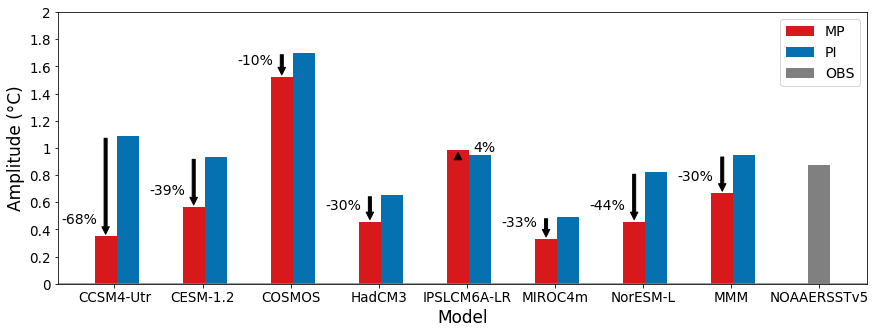

In [12]:
labels = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM','NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1, 1, 1)

# Plot bars
bars_mp = ax1.bar(np.arange(len(labels))+ 0.00, np.array(amp_oni_mp), 0.25, label='MP', color='#D7191C')
bars_pi = ax1.bar(np.arange(len(labels))+ 0.25, np.array(amp_oni_pi), 0.25, label='PI', color='#0571B0')
ax1.bar(8.1, np.array(st_dev_oni_obs.data), 0.25, label='OBS', color='gray')

# Add labels to 'MP' bars
change = (np.array(amp_oni_mp)-np.array(amp_oni_pi))/np.array(amp_oni_pi)*100
labels_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 4:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.3, rect.get_height()-0.05),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    else:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.3, rect.get_height()+0.05),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
# Add arrows from 'PI' bars to 'MP' bars
for i in range(len(labels)):
    arrow = FancyArrowPatch(
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_pi[i].get_height()),
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-'
    )
    ax1.add_patch(arrow)
               
ax1.set_xticks(np.arange(9) + 0.1)
ax1.set_xticklabels(labels2, fontsize=13.5)
ax1.set_yticks([0, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 2])
ax1.set_yticklabels([0, .2, .4, .6, .8, 1, 1.2, 1.4, 1.6, 1.8, 2], fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Amplitude (°C)', fontsize=17)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)

#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/Amplitudes_ONI_change_with_arrows2_v4.png', bbox_inches = 'tight', dpi=300, format='png')

plt.show()

## PDO index (Figure 6)

In [13]:
#PDO region
# Delimt the region for the cube
min_lat = 20.0
max_lat = 70.0
min_lon = 120.0
max_lon = 240.0

# Functions to identify latitudes and longitudes we want to subset to
def pdo_lat(input):
    return min_lat  <= input <= max_lat 
def pdo_lon(input):
    return min_lon  <= input <= max_lon 

pdo_con = iris.Constraint(latitude = pdo_lat, longitude = pdo_lon)
# Subset the cube to the location of interest

pdo_mp_subset = []
for i in MP_models:
    pdo_mp_sub = pdo_con.extract(i)
    pdo_mp_subset.append(pdo_mp_sub)
    
pdo_pi_subset = []
for j in PI_models:
    pdo_pi_sub = pdo_con.extract(j)
    pdo_pi_subset.append(pdo_pi_sub)

pdo_obs_subset = pdo_con.extract(cube_obs)

In [14]:
### Calculate PCs for PDO
## MP
pcs_mp_pdo = []
for mod in range(np.size(pdo_mp_subset)):
    # Add bounds
    if not pdo_mp_subset[mod].coord('latitude').has_bounds():
        pdo_mp_subset[mod].coord('latitude').guess_bounds()
    if not pdo_mp_subset[mod].coord('longitude').has_bounds():
        pdo_mp_subset[mod].coord('longitude').guess_bounds()
    solver = Eof(pdo_mp_subset[mod], weights='area')
    pcs  = solver.pcs(npcs=1)
    pcs_mp_pdo.append(pcs)
    
## PI    
pcs_pi_pdo = []
for mod in range(np.size(pdo_pi_subset)):
    # Add bounds
    if not pdo_pi_subset[mod].coord('latitude').has_bounds():
        pdo_pi_subset[mod].coord('latitude').guess_bounds()
    if not pdo_pi_subset[mod].coord('longitude').has_bounds():
        pdo_pi_subset[mod].coord('longitude').guess_bounds()
    solver = Eof(pdo_pi_subset[mod], weights='area')
    pcs  = solver.pcs(npcs=1)
    pcs_pi_pdo.append(pcs)

## Obs
if not pdo_obs_subset.coord('latitude').has_bounds():
    pdo_obs_subset.coord('latitude').guess_bounds()
if not pdo_obs_subset.coord('longitude').has_bounds():
    pdo_obs_subset.coord('longitude').guess_bounds()        
solver_obsp = Eof(pdo_obs_subset, weights='area')
pcs_obsp  = solver_obsp.pcs(npcs=1)

In [15]:
## Calculate amplitudes
st_dev_pdo_mp = []
st_dev_pdo_pi = []

for i in range(7):
    result_mp = pcs_mp_pdo[i].collapsed('time', iris.analysis.STD_DEV)
    result_pi = pcs_pi_pdo[i].collapsed('time', iris.analysis.STD_DEV)
    st_dev_pdo_mp.append(result_mp)
    st_dev_pdo_pi.append(result_pi)
    
st_dev_pdo_obs = pcs_obsp.collapsed('time', iris.analysis.STD_DEV)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [16]:
### MMM
MMM_pdo_MP = (st_dev_pdo_mp[0].data+st_dev_pdo_mp[1].data+st_dev_pdo_mp[2].data+st_dev_pdo_mp[3].data+st_dev_pdo_mp[4].data+st_dev_pdo_mp[5].data+st_dev_pdo_mp[6].data)/7
MMM_pdo_PI = (st_dev_pdo_pi[0].data+st_dev_pdo_pi[1].data+st_dev_pdo_pi[2].data+st_dev_pdo_pi[3].data+st_dev_pdo_pi[4].data+st_dev_pdo_pi[5].data+st_dev_pdo_mp[6].data)/7
### Concatenate
amp_pdo_mp = [st_dev_pdo_mp[i].data[0] for i in range(np.size(st_dev_pdo_mp))] + [MMM_pdo_MP.data]
amp_pdo_pi = [st_dev_pdo_pi[i].data[0] for i in range(np.size(st_dev_pdo_pi))] + [MMM_pdo_PI.data]

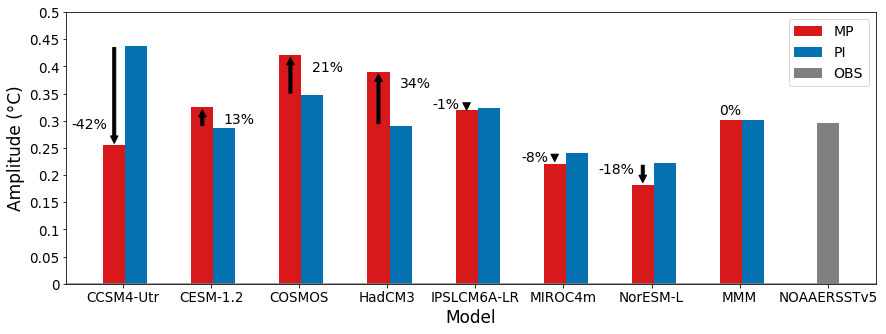

In [17]:
## Plot
labels = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM', 'NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1,1,1)

bars_mp = ax1.bar(np.arange(len(labels))+ 0.00, np.array(amp_pdo_mp), 0.25, label = 'MP', color='#D7191C')
bars_pi = ax1.bar(np.arange(len(labels))+ 0.25, np.array(amp_pdo_pi), 0.25, label = 'PI', color='#0571B0' ) 
ax1.bar(8.1, np.array(st_dev_pdo_obs.data), 0.25, label = 'OBS', color='gray' ) 

# Add labels to MP bars
change = (np.array(amp_pdo_mp)-np.array(amp_pdo_pi))/np.array(amp_pdo_pi)*100
labels_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 0:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2-0.28, rect.get_height()+0.02),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)    
    elif i == 4 or i == 5:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2-0.23, rect.get_height()-0.007),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)   
    elif i == 6:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2-0.3, rect.get_height()+0.01),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)      
    elif i == 7:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2-0.01, rect.get_height()-0.001),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)       
    else:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 +0.42, rect.get_height()-0.04),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
        
# Add arrows
for i in range(len(labels)):
    if i == 7:
        ax1.arrow(bars_pi[i].get_x(), bars_pi[i].get_height(),
              0, (bars_mp[i].get_height()-bars_pi[i].get_height()+0.003),
              head_width=0, head_length=0, fc='white', ec='white')
    else:
        arrow = FancyArrowPatch(
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_pi[i].get_height()),
        (bars_pi[i].get_x() - bars_pi[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-')
        ax1.add_patch(arrow)
    
ax1.set_xticks(np.arange(9)+0.1)
ax1.set_xticklabels(labels2,fontsize=13.5)
ax1.set_yticks([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5])
ax1.set_yticklabels([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5],fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Amplitude (°C)', fontsize=17) 
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/Amplitudes_PDO_change_with_arrows2_v4.png', bbox_inches = 'tight', dpi=300, format='png')

plt.show()

## Pearson correlations (Figure 7)

In [18]:
## Concatenate ONI
ONI_MP = [mean_nino_mp[i] for i in range(np.size(mean_nino_mp))] + [MMM_oni_MP]
ONI_PI = [mean_nino_pi[i] for i in range(np.size(mean_nino_pi))] + [MMM_oni_PI]

In [19]:
## Correlate
corr_mp =[]
corr_pi =[]

corr_obs = stats.pearsonr(mean_nino_obs, pcs_obsp[:, 0]*-1)

for m in range(7):
    corrmp = stats.pearsonr(mean_nino_mp[m], pcs_mp_pdo[m][:, 0])
    if corrmp.data <= 0:
        corrmp =corrmp*-1
    corrpi = stats.pearsonr(mean_nino_pi[m], pcs_pi_pdo[m][:, 0])
    if corrpi.data <= 0:
        corrpi =corrpi*-1
    corr_mp.append(corrmp)
    corr_pi.append(corrpi)

/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:988: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  if np.issubdtype(self.dtype, np.str):
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'month'.
  warnings.warn(msg.format(self.name()))
/apps/developers/libraries/python-libs/1.6/1/bit-64-python3-3.5.2/lib/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'year'.
  warnings.warn(msg.format(self.name()))


In [20]:
### Merge correlations
CORR_MP = [corr_mp[i].data for i in range(np.size(corr_mp))] + [sum(corr_mp[j].data for j in range(np.size(corr_mp))) / 7]
CORR_PI = [corr_pi[i].data for i in range(np.size(corr_pi))] + [sum(corr_pi[j].data for j in range(np.size(corr_pi))) / 7]

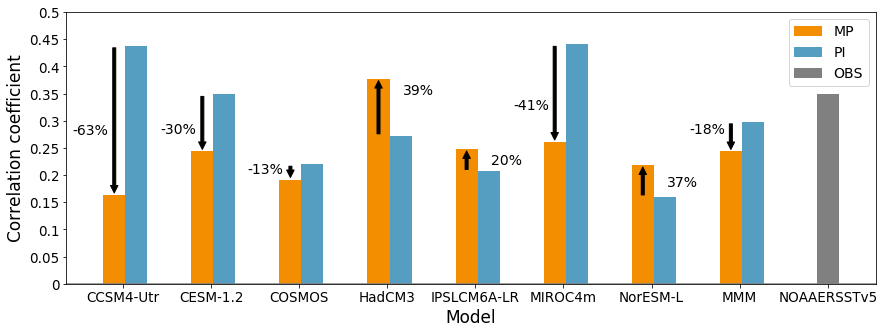

In [21]:
## Plot
labels1 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM']
labels2 = ['CCSM4-Utr','CESM-1.2','COSMOS','HadCM3','IPSLCM6A-LR','MIROC4m','NorESM-L','MMM', 'NOAAERSSTv5']

fig = plt.figure(figsize=(14.5, 5))
ax1 = fig.add_subplot(1,1,1)

bars_mp = ax1.bar(np.arange(len(labels1)) + 0.00, np.array(CORR_MP), 0.25, label = 'MP', color='#F28E00')
bars_pi_pdo = ax1.bar(np.arange(len(labels1)) + 0.25, np.array(CORR_PI), 0.25, label = 'PI', color='#569EC1')
bar_obs = ax1.bar(8.1, np.array(corr_obs.data), 0.25, label = 'OBS', color='gray' ) 

# Add labels to MP bars
change = (np.array(CORR_MP)-np.array(CORR_PI))/np.array(CORR_PI)*100
labels_mp_str = ["%.f" % x for x in change]
for i, rect in enumerate(bars_mp):
    if i == 0:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.27, rect.get_height() + 0.1),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    
    elif i == 1 or i == 7:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.27, rect.get_height() + 0.022),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    elif i == 2:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.29, rect.get_height() - 0),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    
    elif i == 3 or i == 4:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.45, rect.get_height() - 0.04),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    elif i == 5:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 - 0.27, rect.get_height() + 0.05),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)
    else:
        ax1.annotate(labels_mp_str[i] + '%',
                 xy=(rect.get_x() + rect.get_width() / 2 + 0.45, rect.get_height() - 0.05),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=14)

# Add arrows to bars
for i in range(len(labels1)):
    arrow = FancyArrowPatch(
        (bars_pi_pdo[i].get_x() - bars_pi_pdo[i].get_width() / 2, bars_pi_pdo[i].get_height()),
        (bars_pi_pdo[i].get_x() - bars_pi_pdo[i].get_width() / 2, bars_mp[i].get_height()),
        arrowstyle='simple', mutation_scale=15, color='black', linestyle='-'
    )
    ax1.add_patch(arrow)
        
ax1.set_xticks(np.arange(9)+0.1)
ax1.set_xticklabels(labels2,fontsize=13.5)
ax1.set_yticks([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5])
ax1.set_yticklabels([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5],fontsize=13.5)

ax1.set_xlabel('Model', fontsize=17)
ax1.set_ylabel('Correlation coefficient', fontsize=17) 
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1.5)
ax1.legend(fontsize=14)
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/Correlation_bars2_label_v4.png', bbox_inches = 'tight', dpi=300, format='png')

plt.show()

## Lead-lag correlations (Figure 8)

In [22]:
## MMM
# Multiply by -1 the some PDO index data to show its warm phase
mmm_pcs_nino_mp = (mean_nino_mp[0][-2376:].data+mean_nino_mp[1][-2376:].data+mean_nino_mp[2][-2376:].data+mean_nino_mp[3][-2376:].data+mean_nino_mp[4][-2376:].data+mean_nino_mp[5][-2376:].data+mean_nino_mp[6][-2376:].data)/7
mmm_pcs_pdo_mp = (pcs_mp_pdo[0][-2376:, 0].data+pcs_mp_pdo[1][-2376:, 0].data+pcs_mp_pdo[2][-2376:, 0].data+pcs_mp_pdo[3][-2376:, 0].data+pcs_mp_pdo[4][-2376:, 0].data+pcs_mp_pdo[5][-2376:, 0].data+pcs_mp_pdo[6][-2376:, 0].data)/7
mmm_pcs_nino_pi = (mean_nino_pi[0][-2400:].data+mean_nino_pi[1][-2400:].data+mean_nino_pi[2][-2400:].data+mean_nino_pi[3][-2400:].data+mean_nino_pi[4][-2400:].data+mean_nino_pi[5][-2400:].data+mean_nino_pi[6][-2400:].data)/7
mmm_pcs_pdo_pi = (pcs_pi_pdo[0][-2400:, 0].data*-1+pcs_pi_pdo[1][-2400:, 0].data+pcs_pi_pdo[2][-2400:, 0].data+pcs_pi_pdo[3][-2400:, 0].data+pcs_pi_pdo[4][-2400:, 0].data*-1+pcs_pi_pdo[5][-2400:, 0].data*-1+pcs_pi_pdo[6][-2400:, 0].data)/7

In [23]:
# Function to compute the lead-lag correlation
def compute_lag_corr(data1, data2):
    backwards = smt.ccf(data1[::-1], data2[::-1])[::-1]
    forward = smt.ccf(data1, data2)
    return np.r_[backwards[:-1], forward]

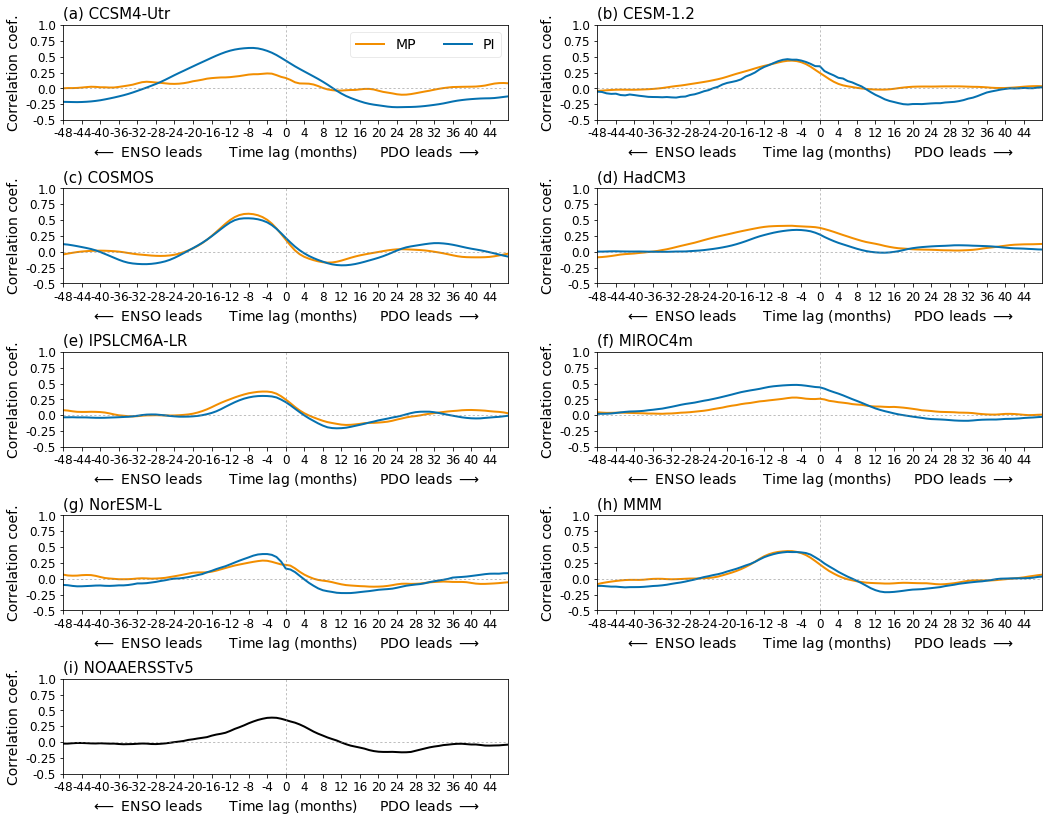

In [24]:
## Lag-correlations MP, PI, MMM and OBS
all_models = ['CCSM4-Utr', 'CESM-1.2', 'COSMOS', 'HadCM3', 'IPSLCM6A-LR', 'MIROC4m', 'NorESM-L']
letters = ['(a) ', '(b) ', '(c) ', '(d) ', '(e) ', '(f) ', '(g) ']

fig, axes = plt.subplots(5, 2, figsize=(17, 13))
axes = axes.flatten()

# Plot single models
for i, (ax, n, l) in enumerate(zip(axes[:7], all_models, letters)):
    
    # MP
    output_mp = compute_lag_corr(mean_nino_mp[i].data, pcs_mp_pdo[i][:, 0].data)
    # PI
    if i == 0 or i == 4 or i == 5:
        output_pi = compute_lag_corr(mean_nino_pi[i].data, pcs_pi_pdo[i][:, 0].data * -1)
    else:
        output_pi = compute_lag_corr(mean_nino_pi[i].data, pcs_pi_pdo[i][:, 0].data)
    # Plot
    ax.plot(np.arange(-len(output_mp) // 2 + 1, len(output_mp) // 2 + 1), output_mp, '-', linewidth=2, c='#F28E00', label='MP')
    ax.plot(np.arange(-len(output_pi) // 2 + 1, len(output_pi) // 2 + 1), output_pi, '-', linewidth=2, c='#0571b0', label='PI')
    ax.set_title(l+n, fontsize=15, loc='left')
    ax.set_xlabel('$\longleftarrow$ ENSO leads      Time lag (months)     PDO leads $\longrightarrow$', size=14)
    ax.set_ylabel('Correlation coef.', size=14)
    
    ax.set_xlim([-48, 48])
    ax.set_xticks(np.arange(-48, 48, 4))
    ax.set_xticklabels(np.arange(-48, 48+4, 4),fontsize=12)
    ax.set_ylim([-0.5,1])
    ax.set_yticks(np.arange(-0.5, 1+.25, .25))
    ax.set_yticklabels(np.arange(-0.5, 1+.25, .25),fontsize=12)
    ## grid lines
    ax.axhline(0, color='grey', linestyle =':', linewidth=0.5)
    ax.axvline(0, color='grey', linestyle =':', linewidth=0.5)

# Plot MMM and obs.
for i, (ax, title) in enumerate(zip(axes[7:9], ['(h) MMM', '(i) NOAAERSSTv5'])):
    output_obs = compute_lag_corr(mean_nino_obs.data, pcs_obsp[:, 0].data * -1)
    output_mmm_mp = compute_lag_corr(mmm_pcs_nino_mp, mmm_pcs_pdo_mp)
    output_mmm_pi = compute_lag_corr(mmm_pcs_nino_pi, mmm_pcs_pdo_pi)

    if i == 0:
        ax.plot(np.arange(-len(output_mmm_mp) // 2 + 1, len(output_mmm_mp) // 2 + 1), output_mmm_mp, '-', linewidth=2, c='#F28E00')
        ax.plot(np.arange(-len(output_mmm_pi) // 2 + 1, len(output_mmm_pi) // 2 + 1), output_mmm_pi, '-', linewidth=2, c='#0571b0')
        ax.set_title(title, fontsize=15, loc='left')
    else:
        ax.plot(np.arange(-len(output_obs) // 2 + 1, len(output_obs) // 2 + 1), output_obs, '-', linewidth=2, c='k')
        ax.set_title(title, fontsize=15, loc='left')
        
    ax.set_xlabel('$\longleftarrow$ ENSO leads      Time lag (months)     PDO leads $\longrightarrow$', size=14)
    ax.set_ylabel('Correlation coef.', size=14)
    ax.set_xlim([-48, 48])
    ax.set_xticks(np.arange(-48, 48, 4))
    ax.set_xticklabels(np.arange(-48, 48+4, 4),fontsize=12)
    ax.set_ylim([-0.5,1])
    ax.set_yticks(np.arange(-0.5, 1+.25, .25))
    ax.set_yticklabels(np.arange(-0.5, 1+.25, .25),fontsize=12)
    ## grid lines
    ax.axhline(0, color='grey', linestyle =':', linewidth=0.5)
    ax.axvline(0, color='grey', linestyle =':', linewidth=0.5)

# Add legend
axes[0].legend(fontsize=14, ncol=2, framealpha=0.4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.72)
axes[9].axis('off')
#plt.savefig('/nfs/see-fs-01_users/mlzp121/ee22kvcs/Task4/lead-lag_correlation.png', bbox_inches = 'tight', dpi=300, format='png')
plt.show()